In [1]:
import sklearn
from pathlib import Path

IMAGES_PATH = Path() / "output" / "08_dimensionality_reduction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print("Saving figure", fig_id)

In [2]:
# PCA - Principle Component Analysis
# extra code

import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

Saving figure dataset_3d_plot_fig8-2


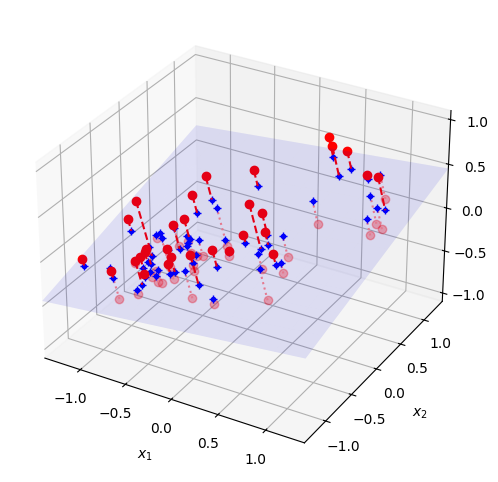

In [3]:
# extra code – this cell generates and saves Figure 8–2

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # dataset reduced to 2D
X3D_inv = pca.inverse_transform(X2D)  # 3D position of the projected samples
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # projection plane coefs
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # plane
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # samples above plane
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # samples below plane

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")

# plot samples and projection lines below plane first
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # projection plane
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")  # projected samples
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

# now plot projection lines and samples above plane
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

save_fig("dataset_3d_plot_fig8-2", tight_layout=False)
plt.show()

Saving figure dataset_2d_plot_fig8-3


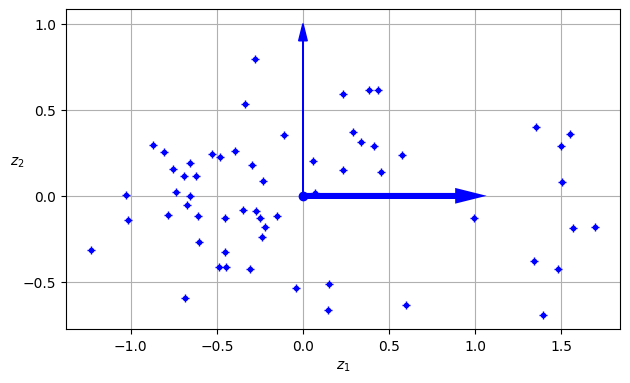

In [4]:
# extra code – this cell generates and saves Figure 8–3
# it is subspace of the 3D above on Fig8-2.

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.plot([0], [0], "bo")
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=4)
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=1)
ax.set_xlabel("$z_1$")
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel("$z_2$", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)
save_fig("dataset_2d_plot_fig8-3")

In [5]:
from sklearn.datasets import make_swiss_roll

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

Saving figure swiss_roll_plot_fig8-4


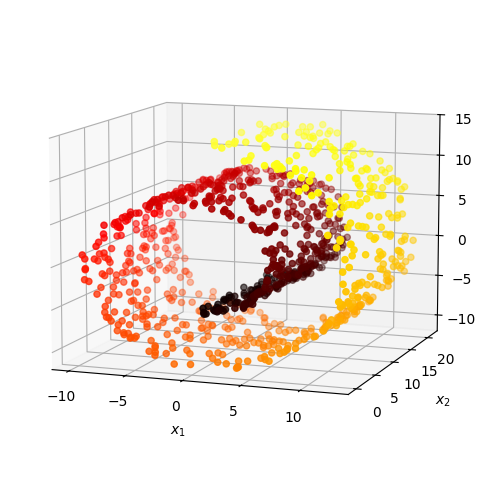

In [6]:
# extra code – this cell generates and saves Figure 8–4

from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
set_xyz_axes(ax, axes)
save_fig("swiss_roll_plot_fig8-4")
plt.show()

Saving figure squished_swiss_roll_plot_fig8-5


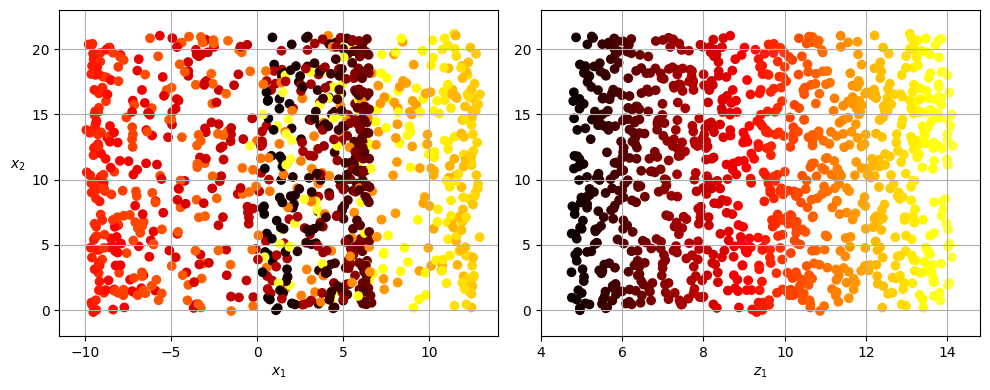

In [7]:
# extra code – this cell generates and saves plots for Figure 8–5
# Simply projecting the figure 8-4 would squash different layers of the Swiss Roll together
# This might loss many information from the raw data

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.scatter(X_swiss[:, 0], X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", labelpad=10, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis([4, 14.8, axes[2], axes[3]])
plt.xlabel("$z_1$")
plt.grid(True)

save_fig("squished_swiss_roll_plot_fig8-5")
plt.show()

Saving figure manifold_decision_boundary_fig8-6_plot1


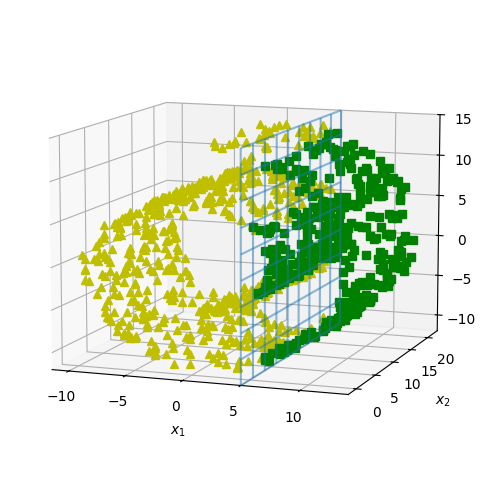

Saving figure manifold_decision_boundary_fig8-6_plot2


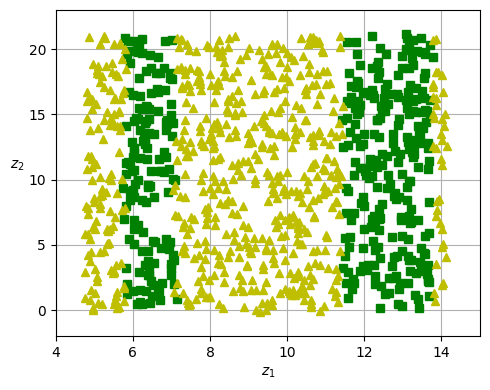

Saving figure manifold_decision_boundary_fig8-6_plot3


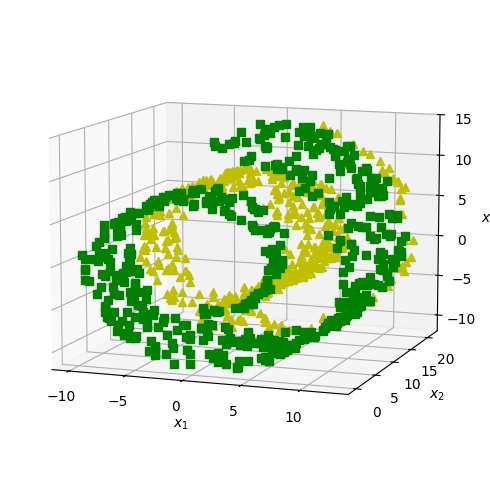

Saving figure manifold_decision_boundary_fig8-6_plot4


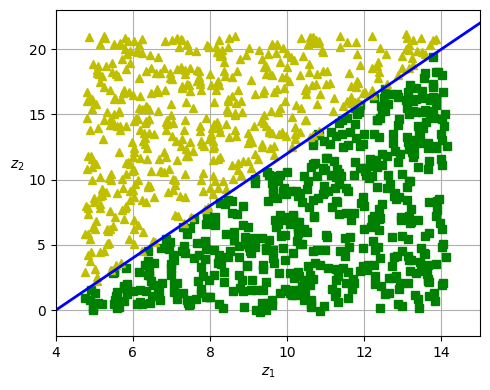

In [8]:
# Manifold Learning
# extra code – this cell generates and saves plots for Figure 8–6
# The decision boundary may not always be simpler with lower dimensions
    
axes = [-11.5, 14, -2, 23, -12, 15]
x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

positive_class = X_swiss[:, 0] > 5
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
set_xyz_axes(ax, axes)
save_fig("manifold_decision_boundary_fig8-6_plot1")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
save_fig("manifold_decision_boundary_fig8-6_plot2")
plt.show()

positive_class = 2 * (t[:] - 4) > X_swiss[:, 1]
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_xlabel("$x_1$", rotation=0)
ax.set_ylabel("$x_2$", rotation=0)
ax.set_zlabel("$x_3$", rotation=0)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
save_fig("manifold_decision_boundary_fig8-6_plot3")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.plot([4, 15], [0, 22], "b-", linewidth=2)
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
save_fig("manifold_decision_boundary_fig8-6_plot4")
plt.show()

Saving figure pca_best_projection_plot_fig8-7


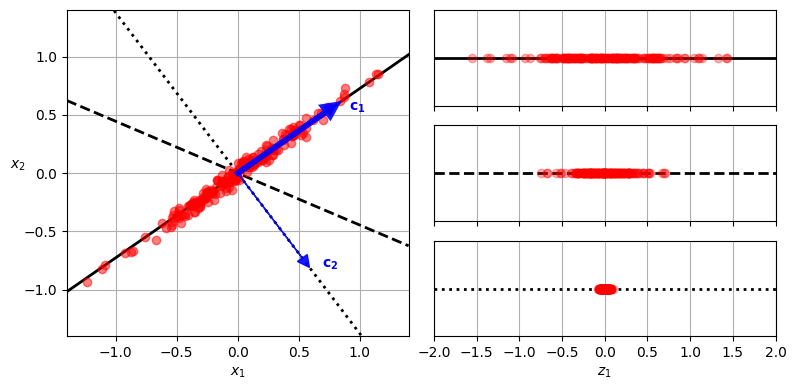

In [9]:
# extra code – this cell generates and saves Figure 8–7

angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X_line = np.random.randn(m, 2) / 10
X_line = X_line @ np.array([[stretch, 0], [0, 1]])  # stretch
X_line = X_line @ [[np.cos(angle), np.sin(angle)],
                   [np.sin(angle), np.cos(angle)]]  # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi / 6), np.sin(angle - 2 * np.pi / 6)])
u3 = np.array([np.cos(angle - np.pi / 2), np.sin(angle - np.pi / 2)])

X_proj1 = X_line @ u1.reshape(-1, 1)
X_proj2 = X_line @ u2.reshape(-1, 1)
X_proj3 = X_line @ u3.reshape(-1, 1)

plt.figure(figsize=(8, 4))
plt.subplot2grid((3, 2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4 * u1[1] / u1[0], 1.4 * u1[1] / u1[0]], "k-",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u2[1] / u2[0], 1.4 * u2[1] / u2[0]], "k--",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u3[1] / u3[0], 1.4 * u3[1] / u3[0]], "k:",
         linewidth=2)
plt.plot(X_line[:, 0], X_line[:, 1], "ro", alpha=0.5)
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=4, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=1, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", color="blue")
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", color="blue")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.grid()

plt.subplot2grid((3, 2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=2)
plt.plot(X_proj1[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=2)
plt.plot(X_proj2[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$")
plt.grid()

save_fig("pca_best_projection_plot_fig8-7")
plt.show()
# the projection onto the solid line preserves the maximum variance, while the projection onto the dotted line
# preserves very little variance, and the projection onto the dashed line preserves an intermediate amount of variance.

In [10]:
# Principal Components
X_centered = X - X.mean(axis = 0)
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:, 0]
c2 = V.T[:, 1]

Note: in principle, the SVD factorization algorithm returns three matrices, U, Σ and V, such that X = UΣV⊺, where U is an m × m matrix, Σ is an m × n matrix, and V is an n × n matrix. But the svd() function returns U, s and V⊺ instead. s is the vector containing all the values on the main diagonal of the top n rows of Σ. Since Σ is full of zeros elsewhere, your can easily reconstruct it from s, like this:

In [11]:
# extra code – shows how to construct Σ from s
m, n = X.shape
Σ = np.zeros_like(X_centered)
Σ[:n, :n] = np.diag(s)
assert np.allclose(X_centered, U @ Σ @ Vt)

In [12]:
V == V.T

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

In [13]:
V.T

array([[ 0.67857588, -0.72817329, -0.09642839],
       [ 0.70073508,  0.6811147 , -0.21225719],
       [ 0.22023881,  0.07646185,  0.97244458]])

In [14]:
# Project down to dimensions
W2 = V.T[:, :2]
X20 = X_centered.dot(W2)

In [15]:
W2

array([[ 0.67857588, -0.72817329],
       [ 0.70073508,  0.6811147 ],
       [ 0.22023881,  0.07646185]])

In [16]:
# Using Scikit-Learn's PCA class implements PCA using SVD decomposition.
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [17]:
pca

PCA(n_components=2)

In [18]:
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

In [19]:
pca.components_.T

array([[ 0.67857588,  0.72817329],
       [ 0.70073508, -0.6811147 ],
       [ 0.22023881, -0.07646185]])

In [20]:
# Explained Variance Ratio
print(pca.explained_variance_ratio_)

[0.7578477  0.15186921]


This tells you that 75.8% of the dataset's variance lies alone the first axis, and 15.2% lies along the second axis. By projecting down to 2D, we lost about 9% of the variance.

In [21]:
1 - pca.explained_variance_ratio_.sum()  # extra code

0.09028309326742034

In [22]:
# Choosing the Right Number of Dimensions
# compute the minimum number of dimensions required to preserve 95% of the training set's variance
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1       # d equals 154

In [23]:
d

154

In [24]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [25]:
pca.n_components_

154

In [26]:
pca.explained_variance_ratio_.sum()  # extra code

0.9501960192613034

Saving figure explained_variance_plot_fig8-8


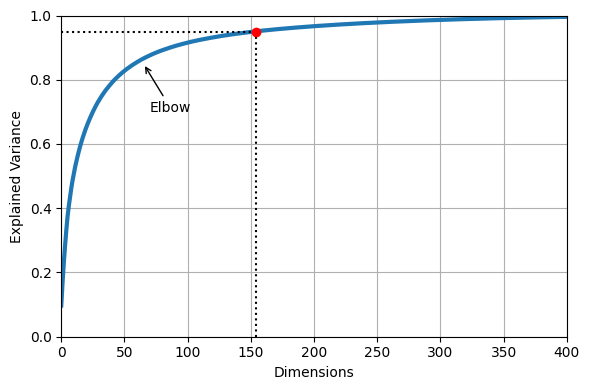

In [27]:
# extra code – this cell generates and saves Figure 8–8

plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ro")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
save_fig("explained_variance_plot_fig8-8")
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42),
                    RandomForestClassifier(random_state=42))
param_distrib = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50, 500)
}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3,
                                random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [29]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 475, 'pca__n_components': 57}

In [30]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

clf = make_pipeline(PCA(random_state=42), SGDClassifier())
param_grid = {"pca__n_components": np.arange(10, 80)}
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train[:1000], y_train[:1000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])})

In [31]:
grid_search.best_params_

{'pca__n_components': 67}

In [32]:
param_grid

{'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
        61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
        78, 79])}

In [33]:
# PCA for Compression
# applying PCA to MNIST dataset while preserving 95% of its variance. we find that each instance will have 
# 150 feature, instead of its original 784 feature.
pca = PCA(0.95)
X_reduced = pca.fit_transform(X_train, y_train)

In [34]:
X_recovered = pca.inverse_transform(X_reduced)

Saving figure mnist_compression_plot_fig8-9


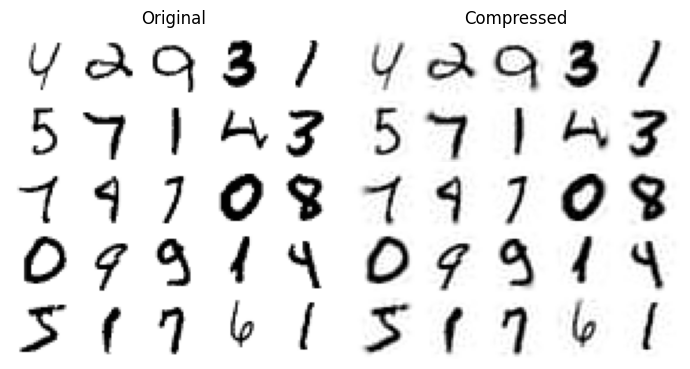

In [35]:
# extra code – this cell generates and saves Figure 8–9

plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

save_fig("mnist_compression_plot_fig8-9")

In [36]:
# Randomized PCA
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

In [37]:
# Incremental PCA
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [38]:
filename = "my_mnist.mmap"
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mmap[:] = X_train  # could be a loop instead, saving the data chunk by chunk
X_mmap.flush()

In [39]:
X_mmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=600, n_components=154)

In [40]:
# Random Projection
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, ε = 5_000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=ε)
d

7300

In [41]:
# extra code – show the equation computed by johnson_lindenstrauss_min_dim
d = int(4 * np.log(m) / (ε ** 2 / 2 - ε ** 3 / 3))
d

7300

In [42]:
n = 20_000
np.random.seed(42)
P = np.random.randn(d, n) / np.sqrt(d)  # std dev = square root of variance

X = np.random.randn(m, n)  # generate a fake dataset
X_reduced = X @ P.T

In [43]:
from sklearn.random_projection import GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(eps=ε, random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X)  # same result as above

In [44]:
components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_)
X_recovered = X_reduced @ components_pinv.T

In [45]:
# extra code – performance comparison between Gaussian and Sparse RP

from sklearn.random_projection import SparseRandomProjection

print("GaussianRandomProjection fit")
%timeit GaussianRandomProjection(random_state=42).fit(X)
print("SparseRandomProjection fit")
%timeit SparseRandomProjection(random_state=42).fit(X)

gaussian_rnd_proj = GaussianRandomProjection(random_state=42).fit(X)
sparse_rnd_proj = SparseRandomProjection(random_state=42).fit(X)
print("GaussianRandomProjection transform")
%timeit gaussian_rnd_proj.transform(X)
print("SparseRandomProjection transform")
%timeit sparse_rnd_proj.transform(X)

GaussianRandomProjection fit
2.96 s ± 49.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SparseRandomProjection fit
2.41 s ± 59.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
GaussianRandomProjection transform
7.87 s ± 130 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SparseRandomProjection transform
4.1 s ± 61.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
# Kernel PCA
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.04)
X_reduced = rbf_pca.fit_transform(X)

Saving figure Swiss_roll_reduced_to_2D_w_Kernels_fig8-10


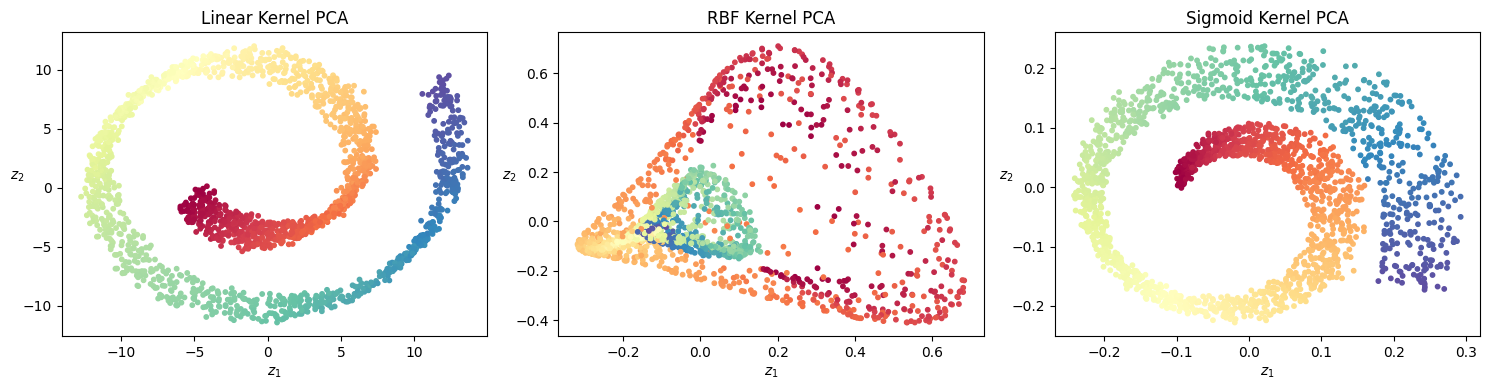

In [47]:
# extra code – this cell generates and saves Figure 8–10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA

# ---------------------------------------------------------
# 1. Generate Swiss Roll
# ---------------------------------------------------------
X_swiss, t = make_swiss_roll(n_samples=2000, noise=0.2, random_state=42)

# ---------------------------------------------------------
# 2. Helper function to run Kernel PCA
# ---------------------------------------------------------
def run_kpca(kernel, **kwargs):
    kpca = KernelPCA(
        n_components=2,
        kernel=kernel,
        **kwargs,
        fit_inverse_transform=False,
        random_state=42
    )
    return kpca.fit_transform(X_swiss)

# ---------------------------------------------------------
# 3. Compute embeddings
# ---------------------------------------------------------
X_lin = run_kpca("linear")
X_rbf = run_kpca("rbf", gamma=0.04)
X_sig = run_kpca("sigmoid", gamma=0.001, coef0=1)

# ---------------------------------------------------------
# 4. Plotting function
# ---------------------------------------------------------
def plot_embedding(Z, title):
    plt.scatter(Z[:, 0], Z[:, 1], c=t, cmap=plt.cm.Spectral, s=10)
    plt.title(title)
    plt.xlabel("$z_1$")
    plt.ylabel("$z_2$", rotation=0)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plot_embedding(X_lin, "Linear Kernel PCA")

plt.subplot(1, 3, 2)
plot_embedding(X_rbf, "RBF Kernel PCA")

plt.subplot(1, 3, 3)
plot_embedding(X_sig, "Sigmoid Kernel PCA")

plt.tight_layout()

save_fig("Swiss_roll_reduced_to_2D_w_Kernels_fig8-10")
plt.show()

Saving figure KernelPCA_and_reconstruction_pre_image_fig8-11


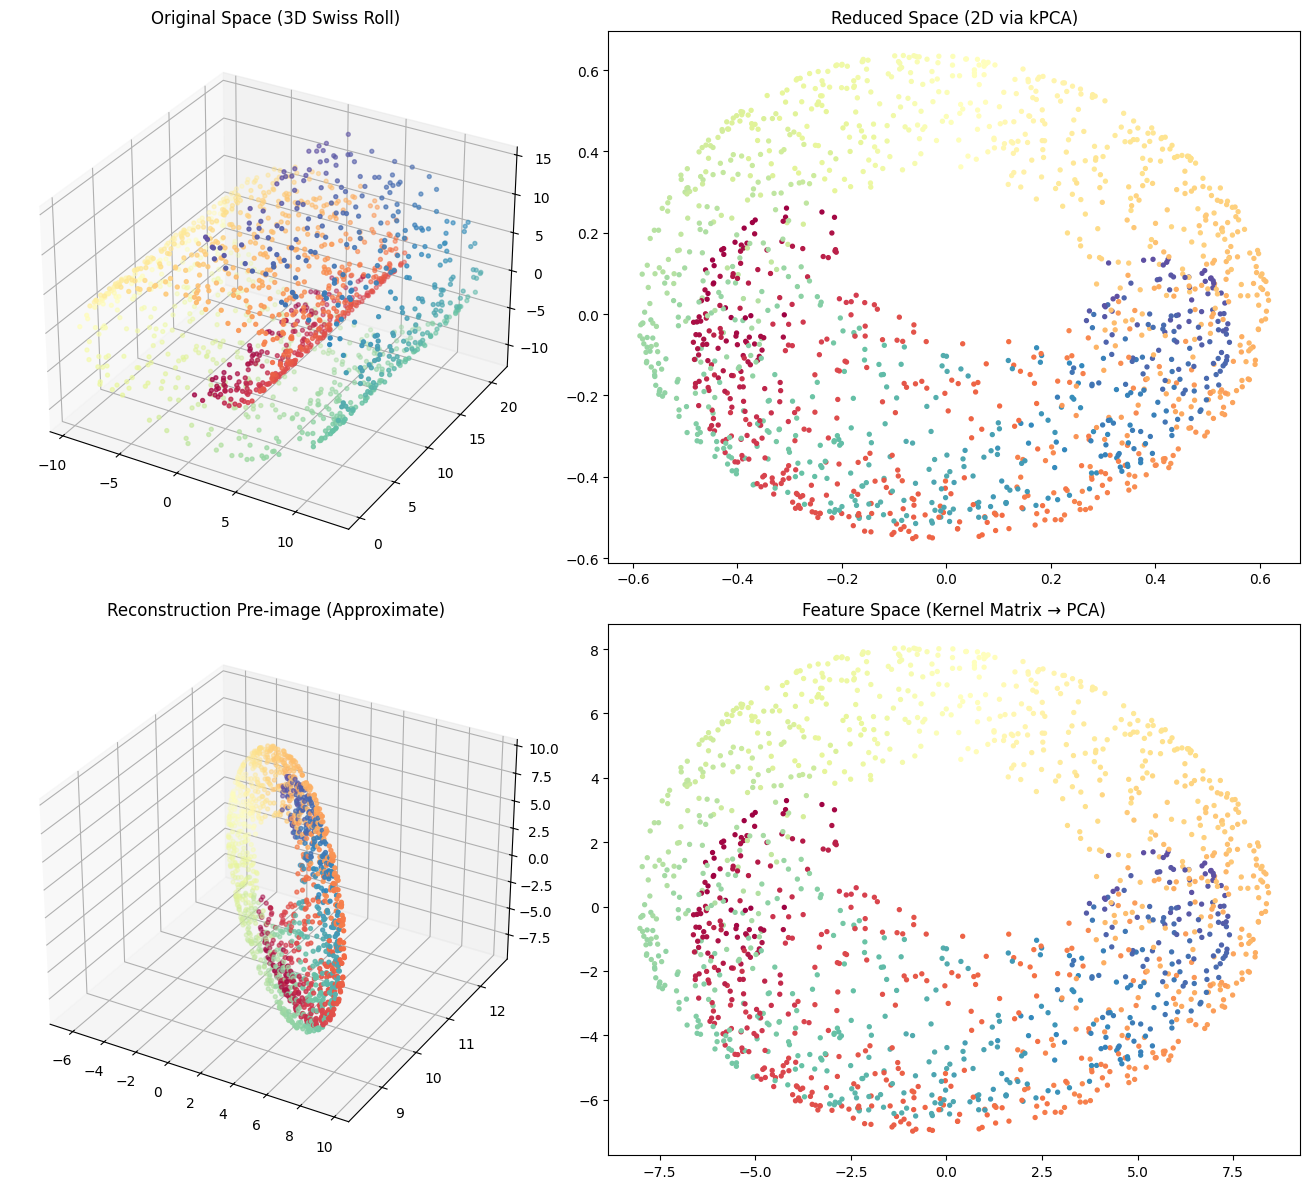

In [48]:
# extra code – this cell generates and saves Figure 8–11
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.decomposition import PCA

# ---------------------------------------------------------
# 1. Generate Swiss Roll dataset
# ---------------------------------------------------------
X_swiss, t = make_swiss_roll(n_samples=1500, noise=0.05)
colors = t

# ---------------------------------------------------------
# 2. Kernel PCA (RBF kernel)
# ---------------------------------------------------------
gamma = 0.01
kpca = KernelPCA(
    n_components=2,
    kernel="rbf",
    gamma=gamma,
    fit_inverse_transform=True
)
X_kpca = kpca.fit_transform(X_swiss)

# ---------------------------------------------------------
# 3. Feature space approximation
#    Use the centered kernel matrix and apply PCA to it
# ---------------------------------------------------------
K = pairwise_kernels(X_swiss, metric="rbf", gamma=gamma)

# Center the kernel matrix
N = K.shape[0]
one_n = np.ones((N, N)) / N
K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n

# PCA on centered kernel matrix → 2D visualization
feature_pca = PCA(n_components=2)
X_feature = feature_pca.fit_transform(K_centered)

# ---------------------------------------------------------
# 4. Reconstruction (pre-image)
# ---------------------------------------------------------
X_reconstructed = kpca.inverse_transform(X_kpca)

# ---------------------------------------------------------
# 5. Plotting
# ---------------------------------------------------------
fig = plt.figure(figsize=(14, 12))

# --- Original 3D Swiss Roll ---
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=colors, cmap=plt.cm.Spectral, s=8)
ax1.set_title("Original Space (3D Swiss Roll)")

# --- Reduced 2D space ---
ax2 = fig.add_subplot(222)
ax2.scatter(X_kpca[:, 0], X_kpca[:, 1], c=colors, cmap=plt.cm.Spectral, s=8)
ax2.set_title("Reduced Space (2D via kPCA)")

# --- Feature space approximation ---
ax3 = fig.add_subplot(224)
ax3.scatter(X_feature[:, 0], X_feature[:, 1], c=colors, cmap=plt.cm.Spectral, s=8)
ax3.set_title("Feature Space (Kernel Matrix → PCA)")

# --- Reconstruction pre-image ---
ax4 = fig.add_subplot(223, projection='3d')
ax4.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], X_reconstructed[:, 2],
            c=colors, cmap=plt.cm.Spectral, s=8)
ax4.set_title("Reconstruction Pre-image (Approximate)")
plt.tight_layout()

save_fig("KernelPCA_and_reconstruction_pre_image_fig8-11")
plt.show()

In [49]:
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.0433,
                    fit_inverse_transform = True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

0.9998628039064864

In [51]:
# LLE
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

Saving figure lle_unrolling_plot


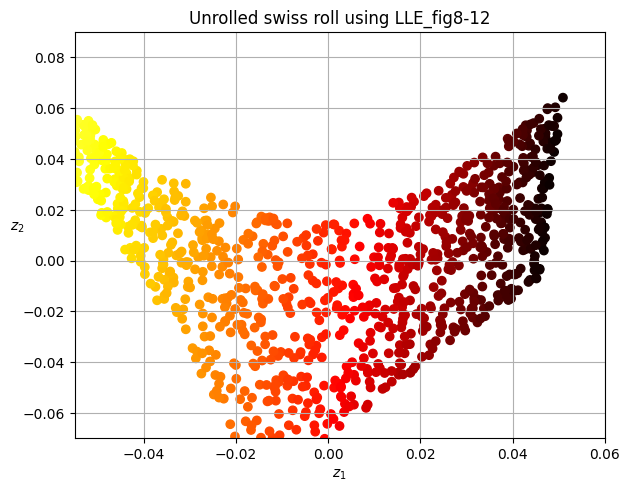

In [52]:
# extra code – this cell generates and saves Figure 8–12

plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1],
            c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.title("Unrolled swiss roll using LLE_fig8-12")
plt.show()

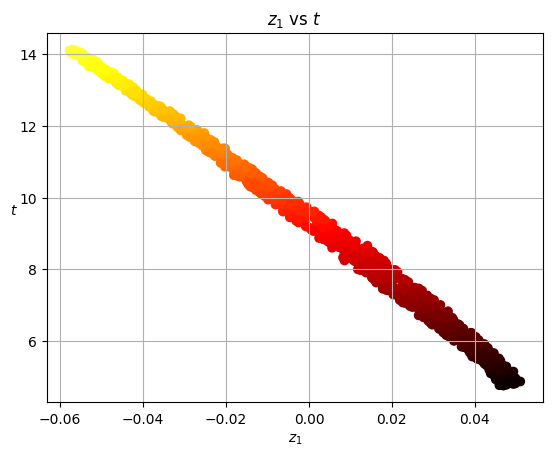

In [53]:
# extra code – shows how well correlated z1 is to t: LLE worked fine
plt.title("$z_1$ vs $t$")
plt.scatter(X_unrolled[:, 0], t, c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$t$", rotation=0)
plt.grid(True)
plt.show()

In [54]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, normalized_stress=False, random_state=42)
X_reduced_mds = mds.fit_transform(X_swiss)

/home/fliu2/.local/share/pipx/venvs/jupyterlab/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


In [55]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X_swiss)

In [56]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(X_swiss)

Saving figure other_dim_reduction_plot_fig8-13


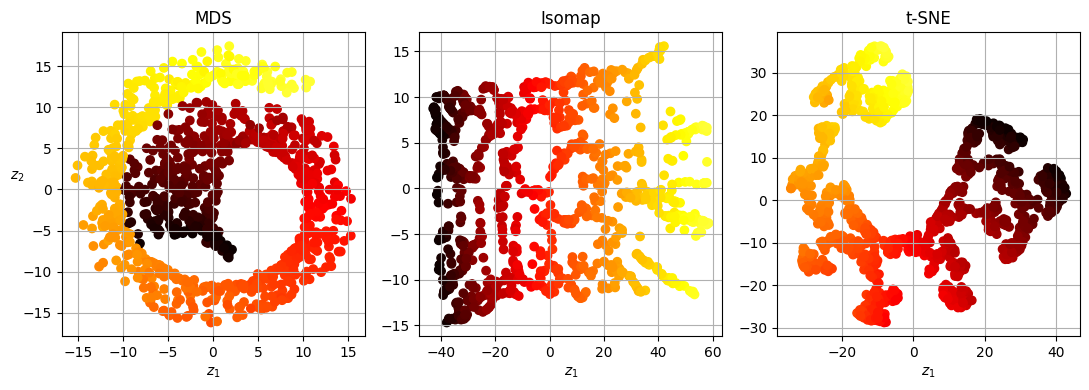

In [57]:
# extra code – this cell generates and saves Figure 8–13

titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

save_fig("other_dim_reduction_plot_fig8-13")
plt.show()

In [58]:
# Extra meterial: Kernel PCA
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04, random_state=42)
X_reduced = rbf_pca.fit_transform(X_swiss)

Saving figure extra_meterial_kernel_PCA_plot


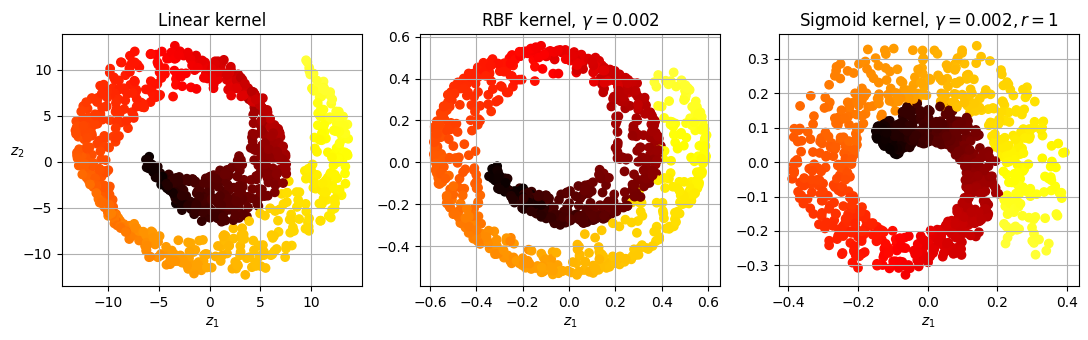

In [59]:
lin_pca = KernelPCA(kernel="linear")
rbf_pca = KernelPCA(kernel="rbf", gamma=0.002)
sig_pca = KernelPCA(kernel="sigmoid", gamma=0.002, coef0=1)

kernel_pcas = ((lin_pca, "Linear kernel"),
               (rbf_pca, rf"RBF kernel, $\gamma={rbf_pca.gamma}$"),
               (sig_pca, rf"Sigmoid kernel, $\gamma={sig_pca.gamma}, r={sig_pca.coef0}$"))

plt.figure(figsize=(11, 3.5))
for idx, (kpca, title) in enumerate(kernel_pcas):
    kpca.n_components = 2
    kpca.random_state = 42
    X_reduced = kpca.fit_transform(X_swiss)

    plt.subplot(1, 3, idx + 1)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if idx == 0:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid()
save_fig("extra_meterial_kernel_PCA_plot")
plt.show()

In [60]:
# Exercise 9: Load the MNIST dataset (introduced in chapter 3) and split it into a training set and a test set
# (take the first 60,000 instances for training, and the remaining 10,000 for testing).
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [61]:
# Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
%time rnd_clf.fit(X_train, y_train)

CPU times: user 34 s, sys: 81.2 ms, total: 34.1 s
Wall time: 34.3 s


RandomForestClassifier(random_state=42)

In [62]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

In [63]:
# Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [64]:
# Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster?
rnd_clf_with_pca = RandomForestClassifier(n_estimators=100, random_state=42)
%time rnd_clf_with_pca.fit(X_train_reduced, y_train)

CPU times: user 1min 36s, sys: 1.57 s, total: 1min 38s
Wall time: 1min 36s


RandomForestClassifier(random_state=42)

In [65]:
# Next evaluate the classifier on the test set: how does it compare to the previous classifier?
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9488

In [66]:
# Try again with an SGDClassifier. How much does PCA help now?
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
%time sgd_clf.fit(X_train, y_train)

CPU times: user 1min 56s, sys: 163 ms, total: 1min 56s
Wall time: 1min 56s


SGDClassifier(random_state=42)

In [67]:
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.874

In [68]:
sgd_clf_with_pca = SGDClassifier(random_state=42)
%time sgd_clf_with_pca.fit(X_train_reduced, y_train)

CPU times: user 24.7 s, sys: 1.78 s, total: 26.5 s
Wall time: 24.3 s


SGDClassifier(random_state=42)

In [69]:
y_pred = sgd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.8959

In [85]:
# Exercise 10: Use t-SNE to reduce the first 5,000 images of the MNIST dataset down to two dimensions and plot
# the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's 
# target class.
X_sample, y_sample = X_train[:5000], y_train[:5000]

In [86]:
# use t-SNE to reduce dimensionality down to 2D so we can plot the dataset:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
%time X_reduced = tsne.fit_transform(X_sample)

CPU times: user 1min 29s, sys: 1.63 s, total: 1min 30s
Wall time: 10 s


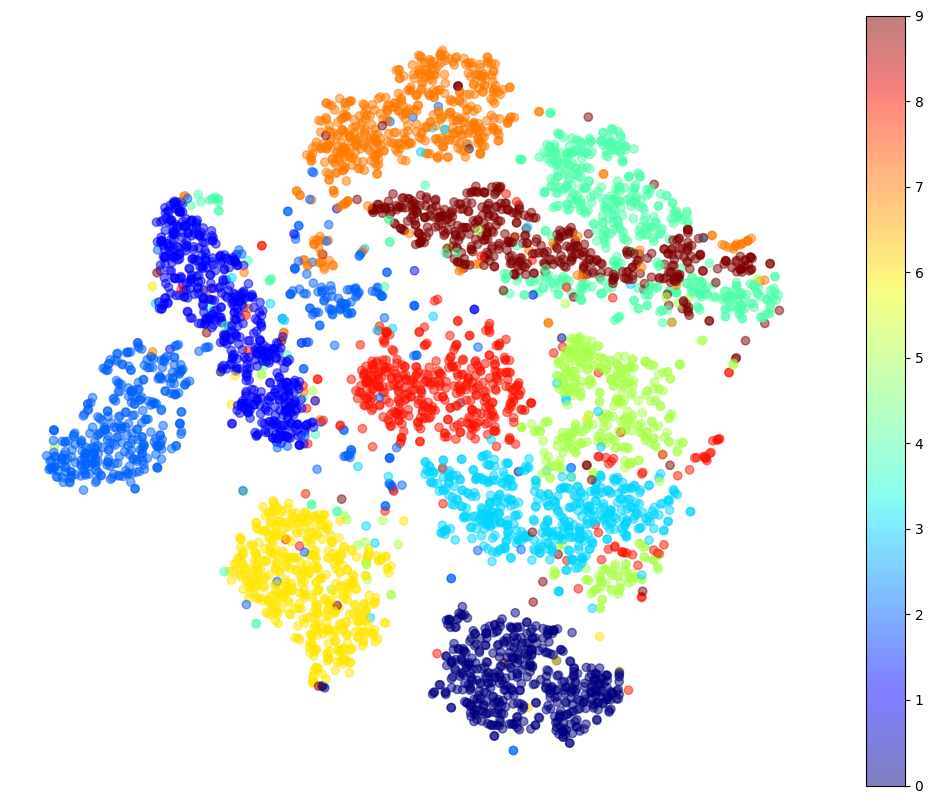

In [87]:
# use Matplotlib's scatter() function to plot a scatterplot, using a different color for each digit:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y_sample.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

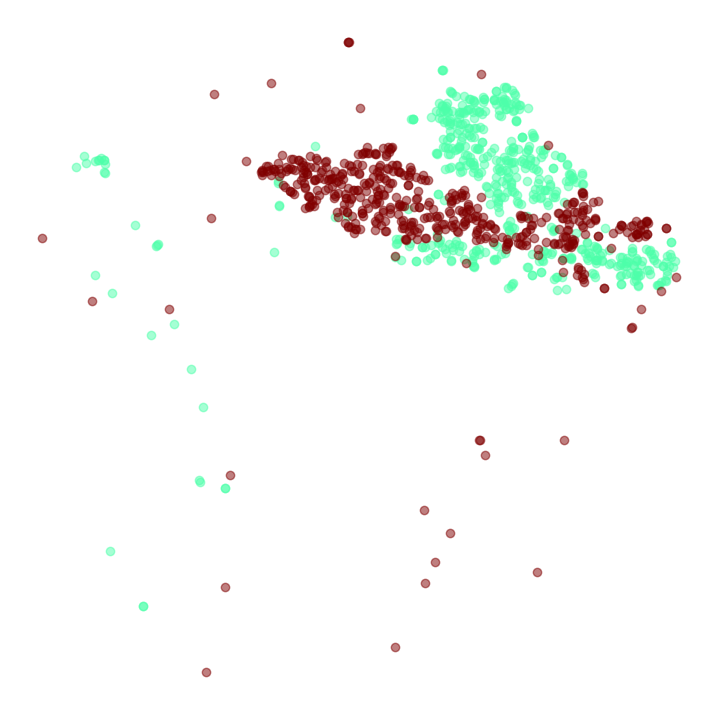

In [88]:
plt.figure(figsize=(9, 9))
cmap = plt.cm.jet
for digit in ('4', '9'):
    plt.scatter(X_reduced[y_sample == digit, 0], X_reduced[y_sample == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

In [89]:
idx = (y_sample == '4') | (y_sample == '9')
X_subset = X_sample[idx]
y_subset = y_sample[idx]

tsne_subset = TSNE(n_components=2, init="random", learning_rate="auto",
                   random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

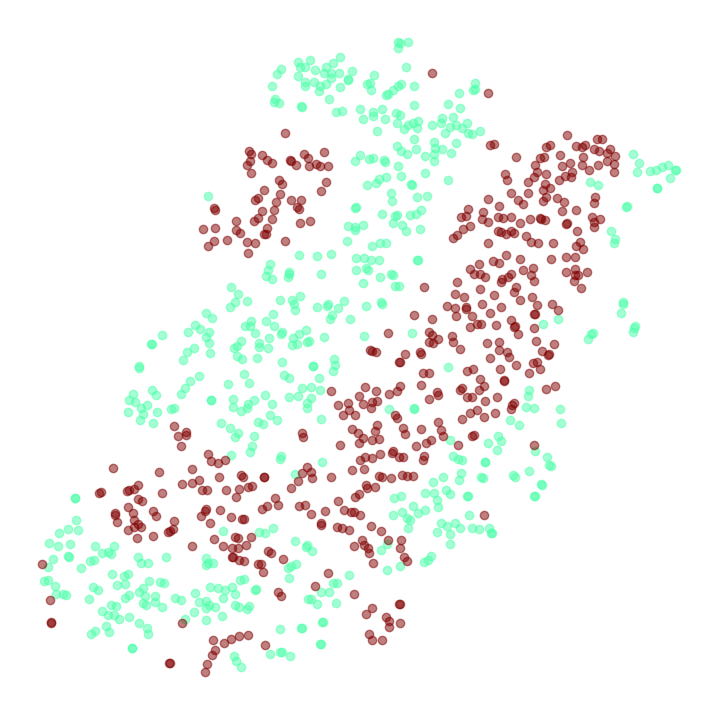

In [90]:
plt.figure(figsize=(9, 9))
for digit in ('4', '9'):
    plt.scatter(X_subset_reduced[y_subset == digit, 0],
                X_subset_reduced[y_subset == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

In [91]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

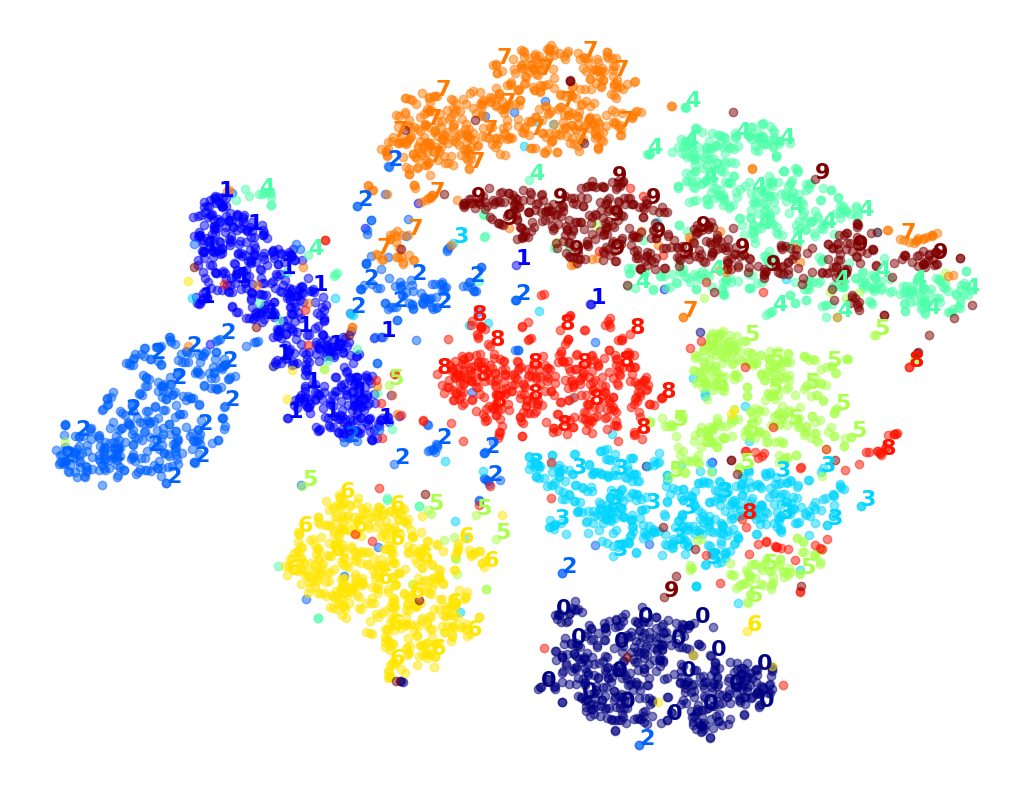

In [92]:
plot_digits(X_reduced, y_sample)

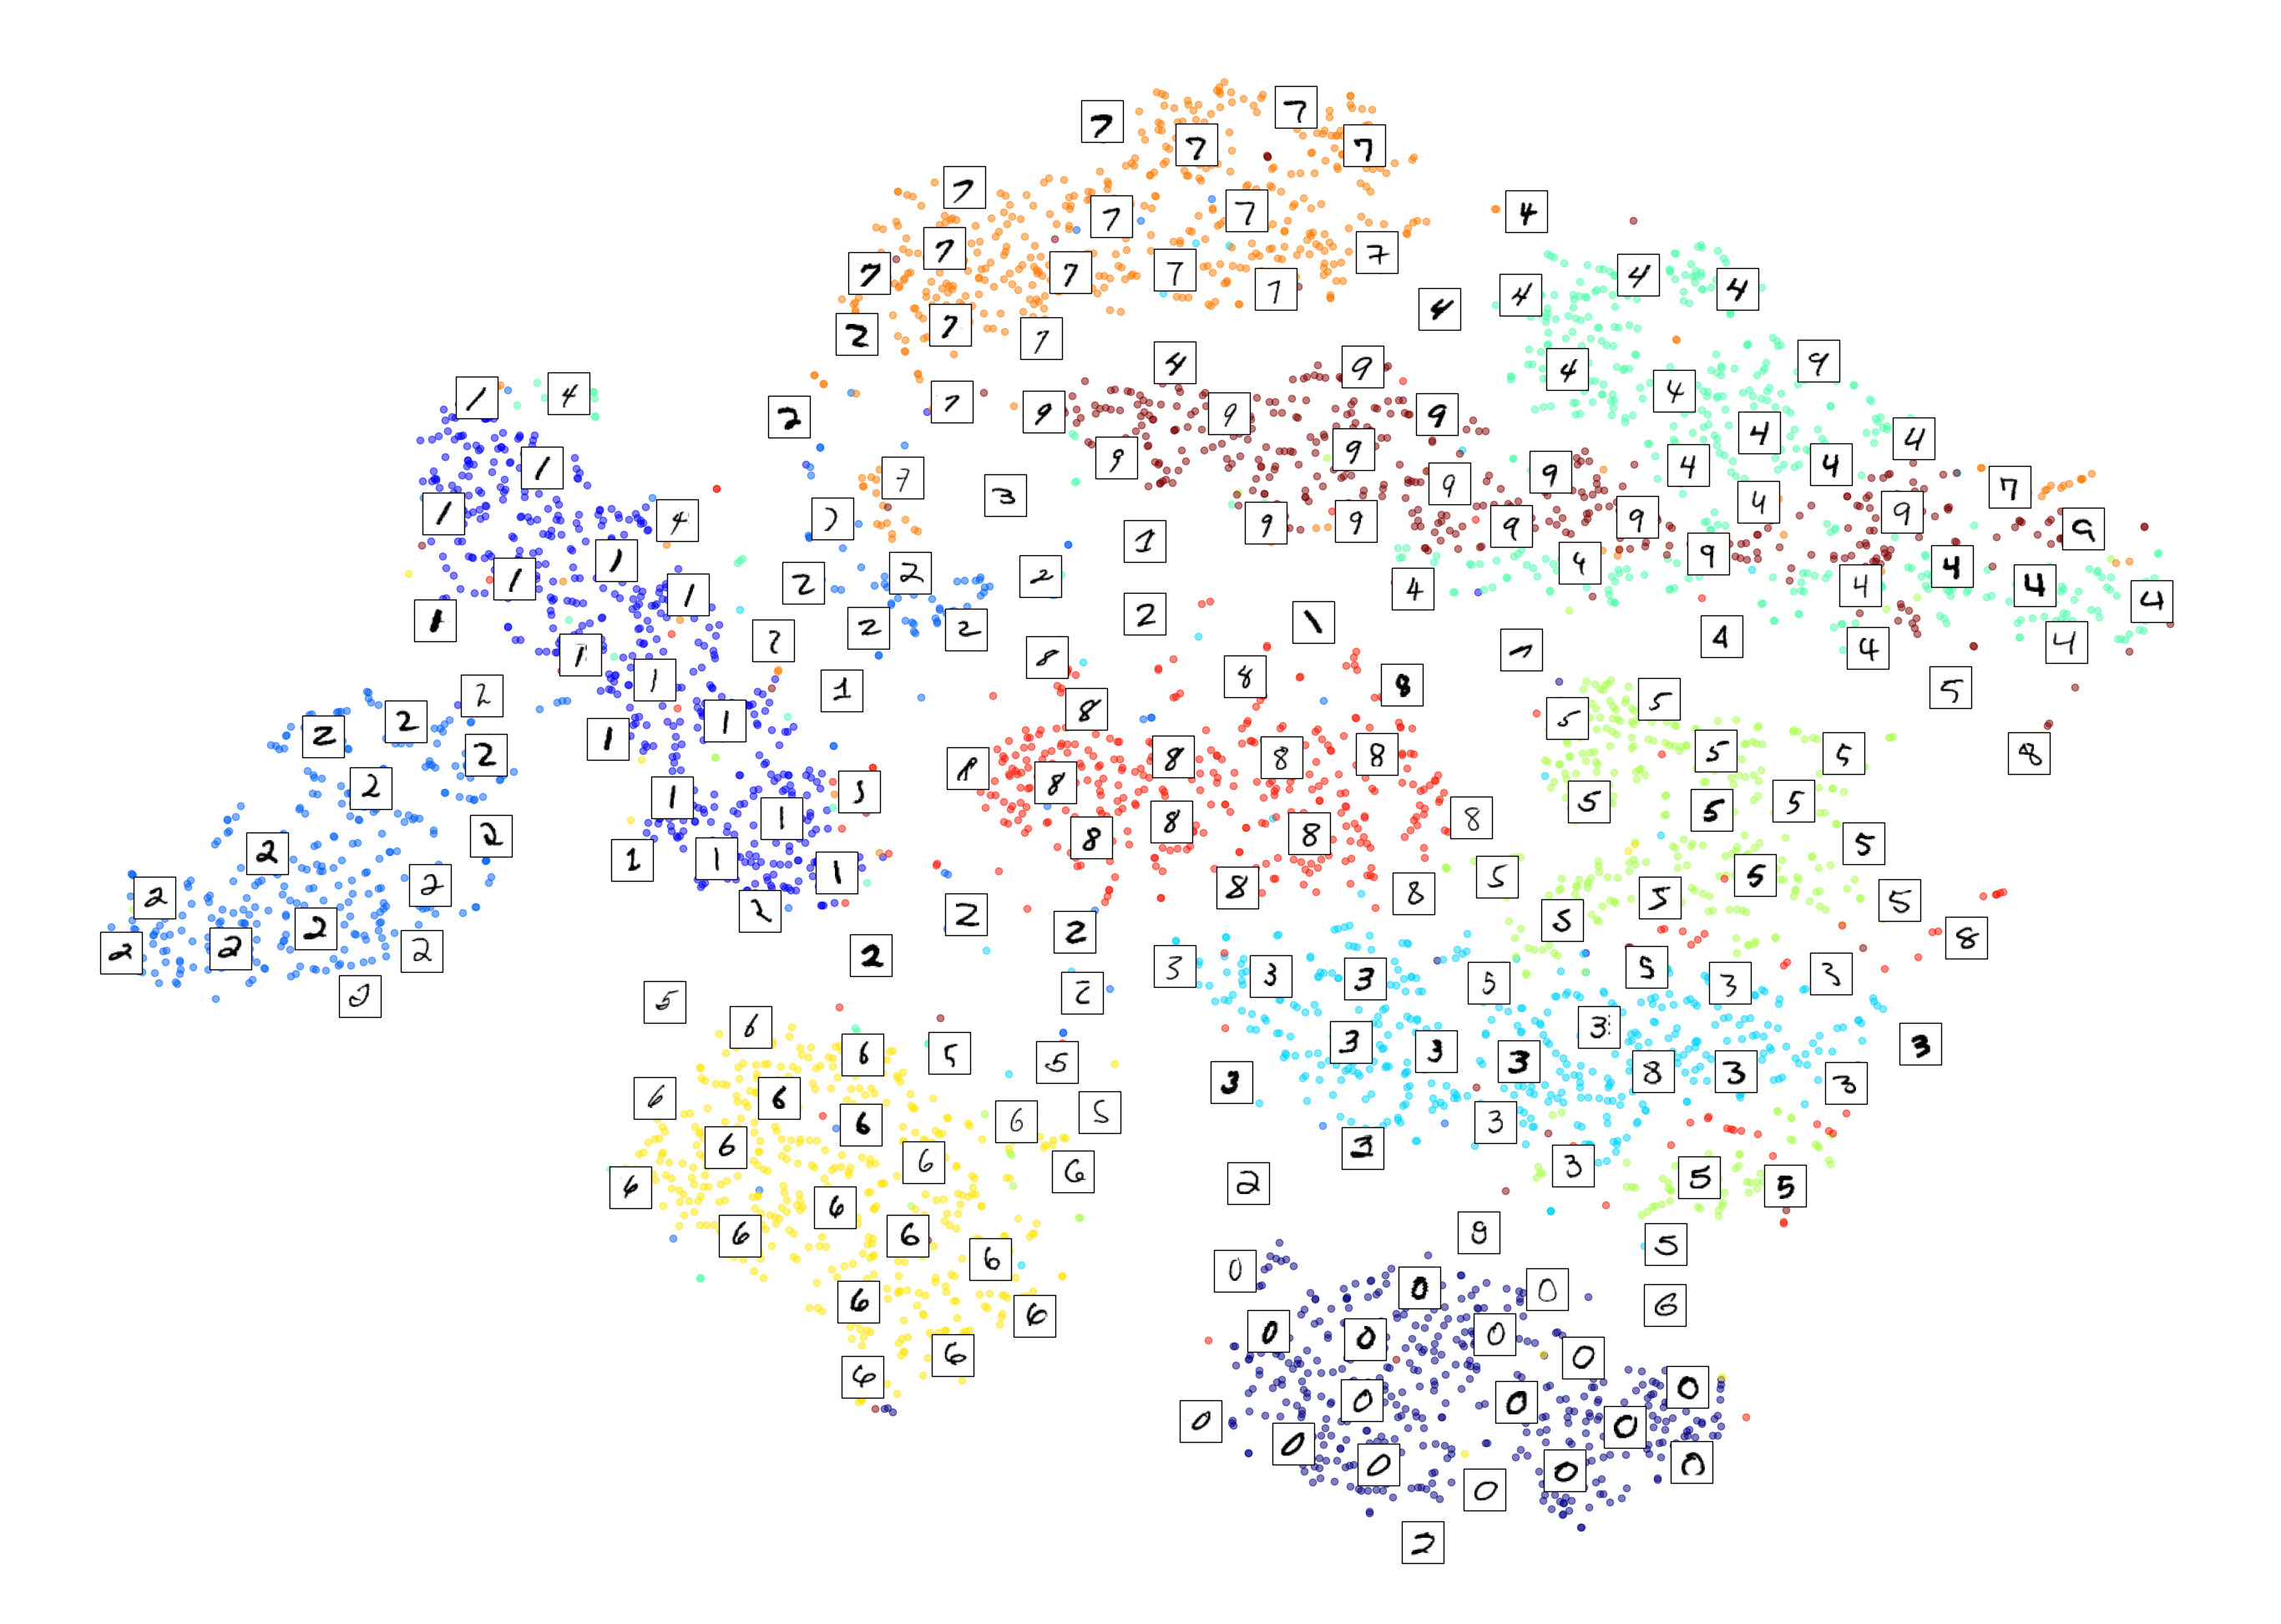

In [93]:
plot_digits(X_reduced, y_sample, images=X_sample, figsize=(35, 25))

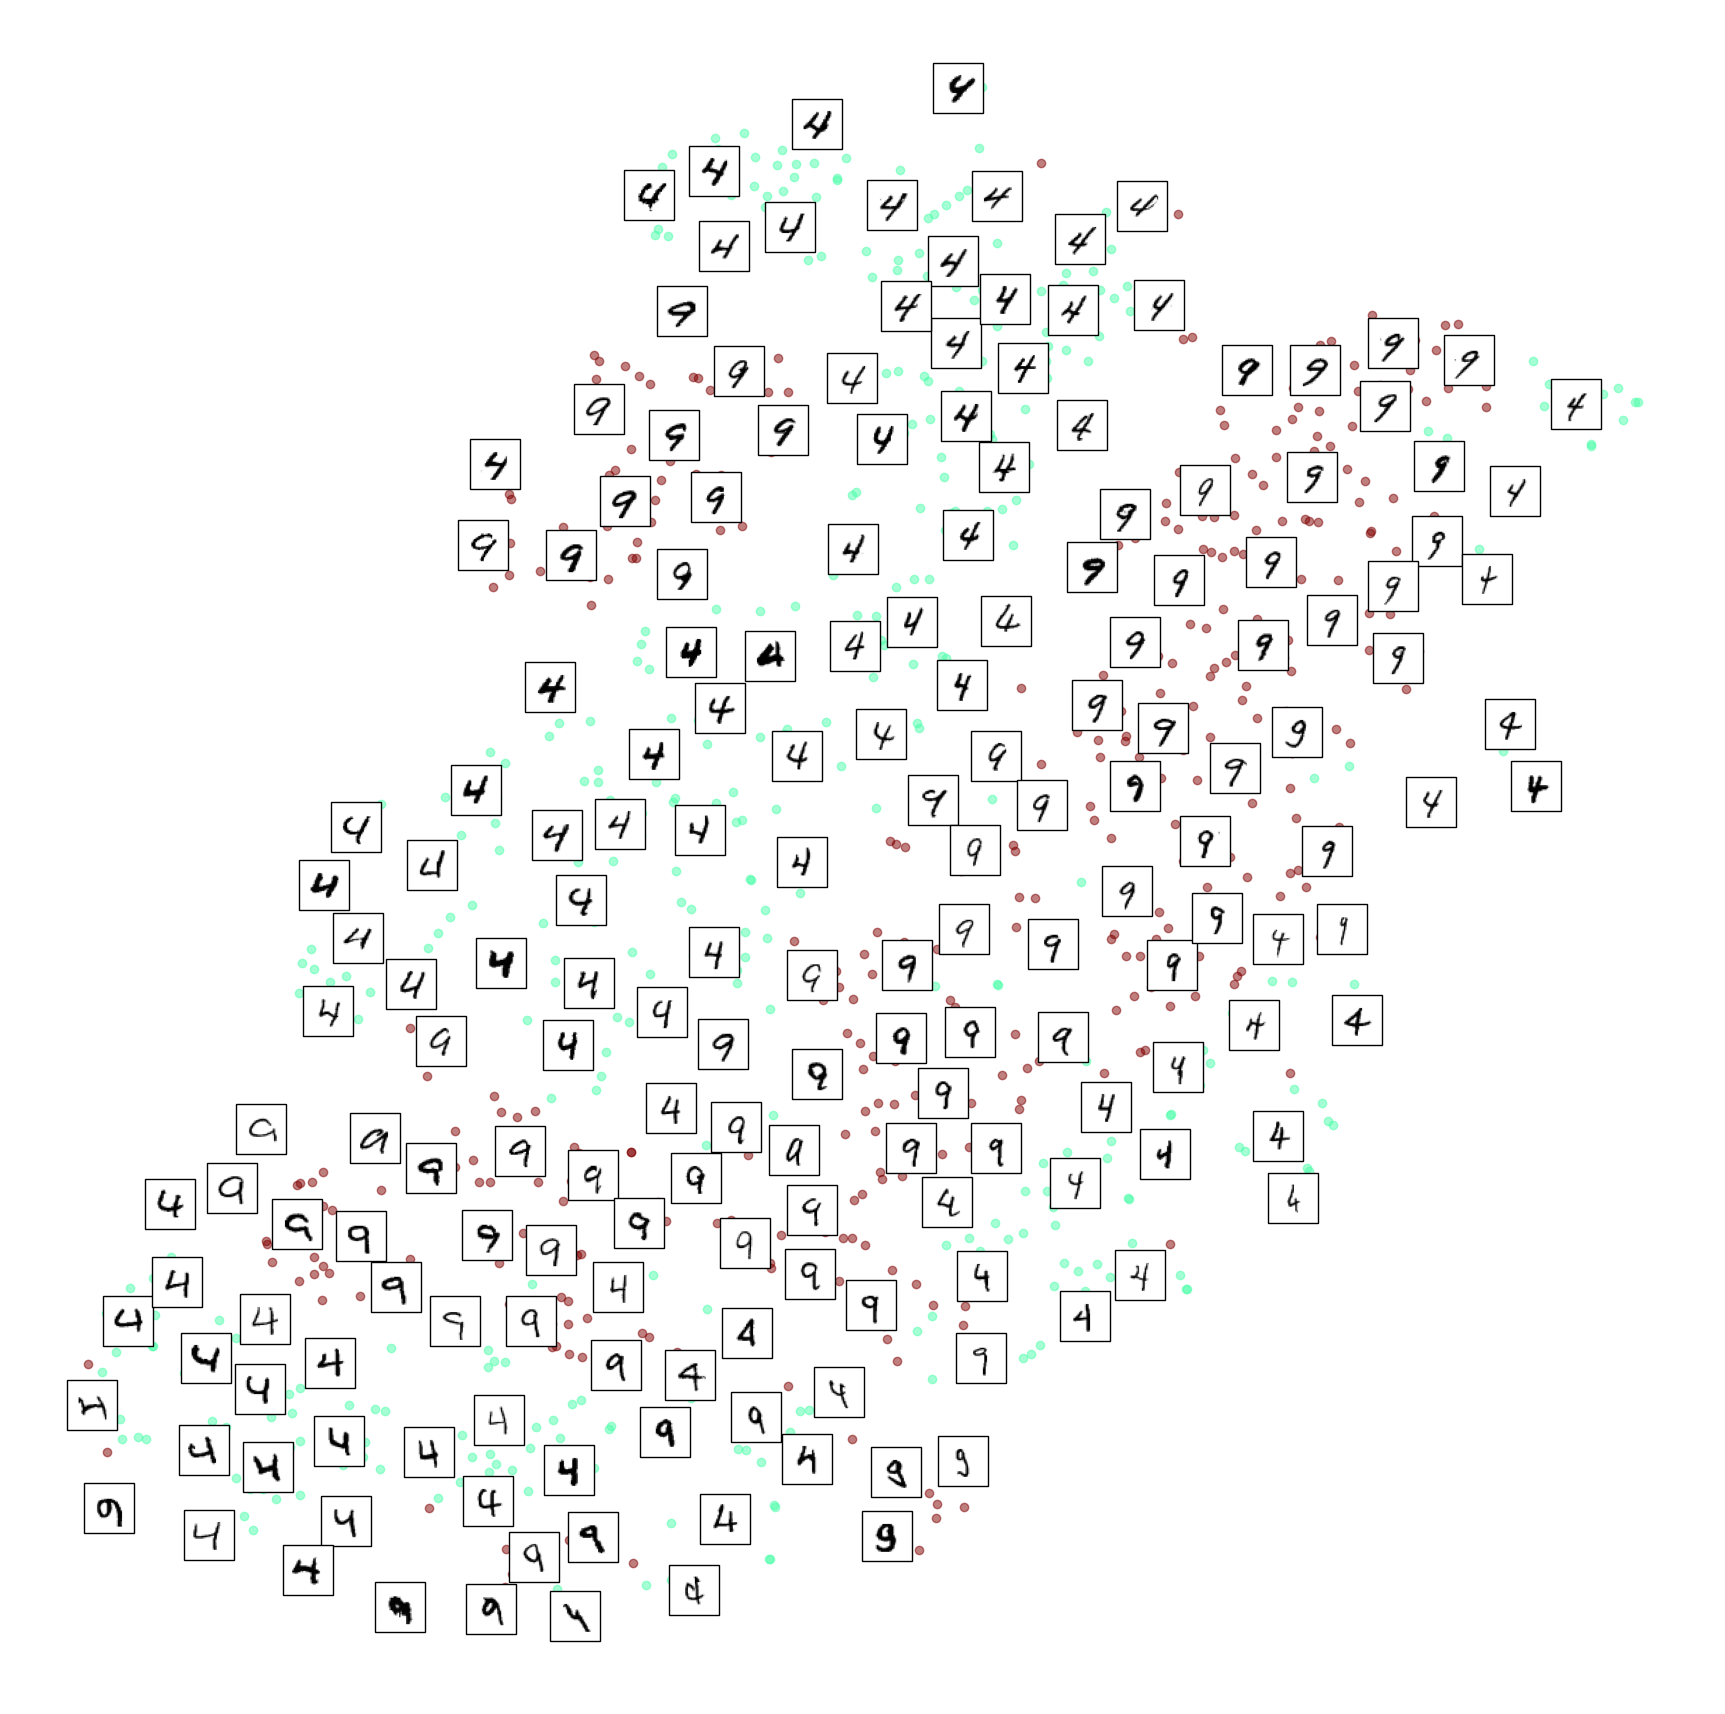

In [94]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

CPU times: user 1.05 s, sys: 713 ms, total: 1.76 s
Wall time: 134 ms


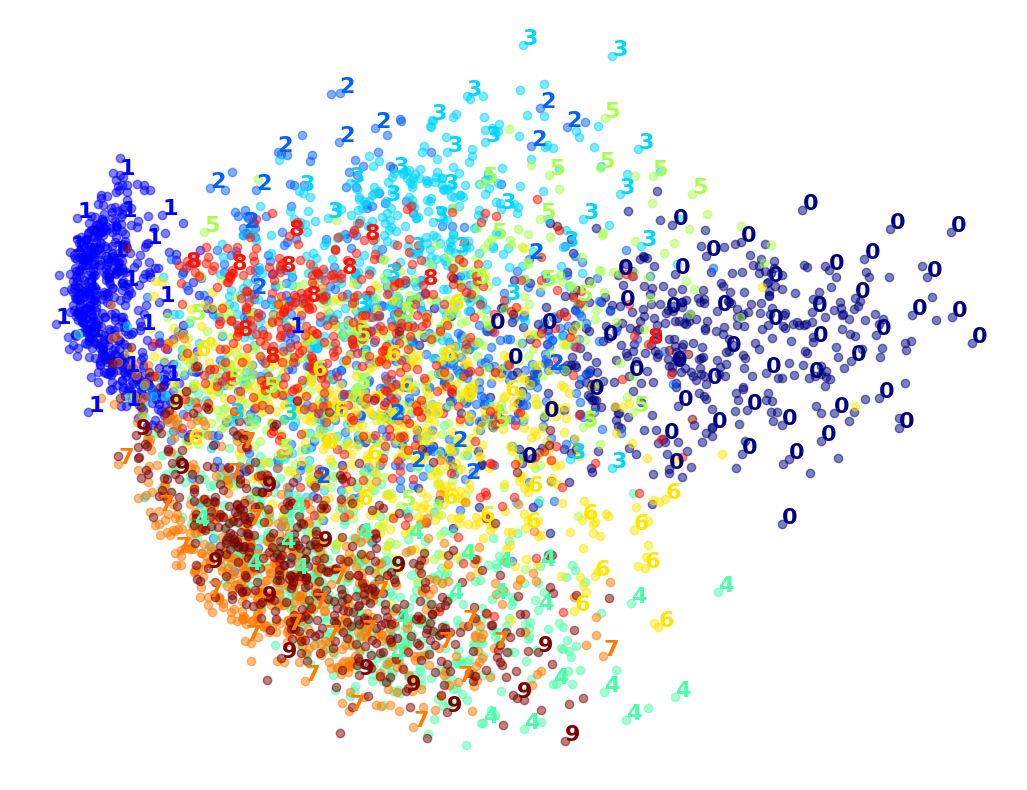

In [95]:
pca = PCA(n_components=2, random_state=42)
%time X_pca_reduced = pca.fit_transform(X_sample)
plot_digits(X_pca_reduced, y_sample)
plt.show()

CPU times: user 3.36 s, sys: 60.3 ms, total: 3.42 s
Wall time: 1.37 s


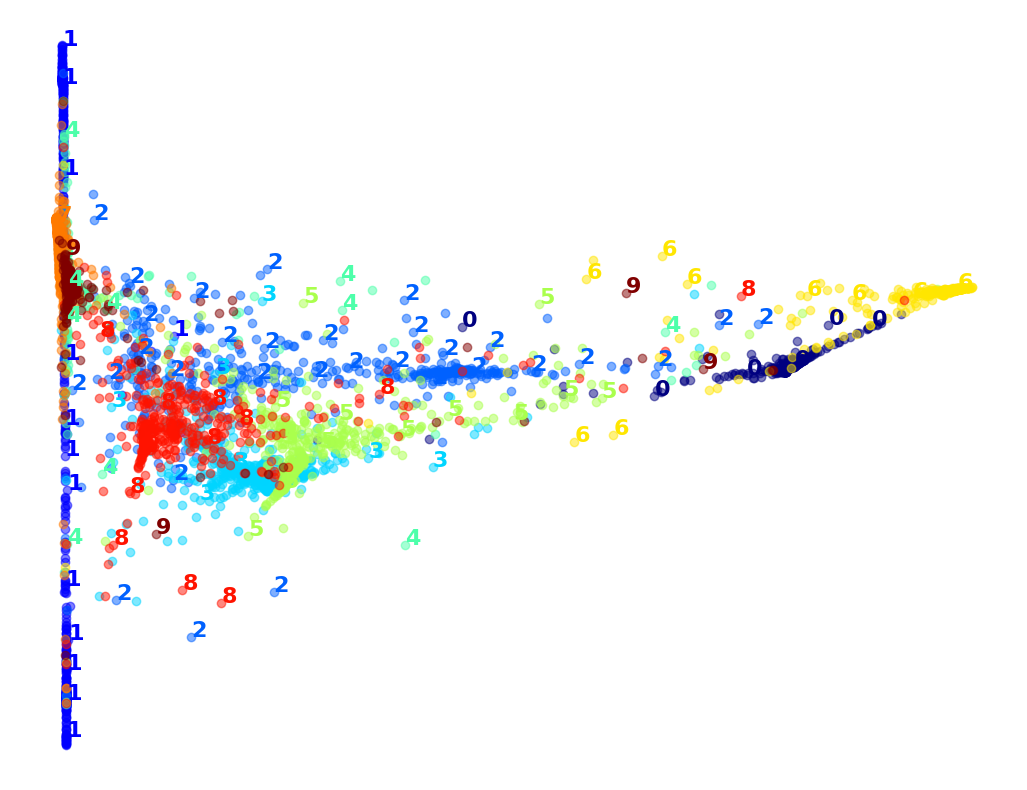

In [96]:
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
%time X_lle_reduced = lle.fit_transform(X_sample)
plot_digits(X_lle_reduced, y_sample)
plt.show()

CPU times: user 12.1 s, sys: 276 ms, total: 12.4 s
Wall time: 1.76 s


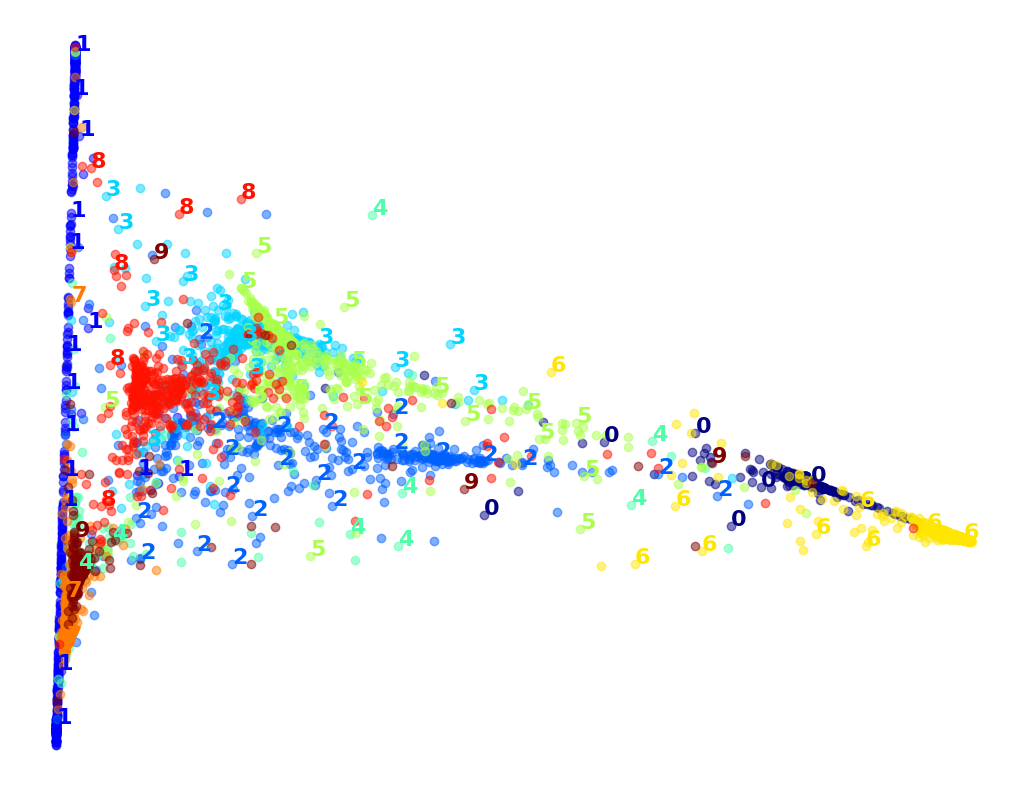

In [97]:
pca_lle = make_pipeline(PCA(n_components=0.95),
                        LocallyLinearEmbedding(n_components=2, random_state=42))

%time X_pca_lle_reduced = pca_lle.fit_transform(X_sample)
plot_digits(X_pca_lle_reduced, y_sample)
plt.show()

CPU times: user 21min 56s, sys: 1h 28min 49s, total: 1h 50min 45s
Wall time: 13min 2s


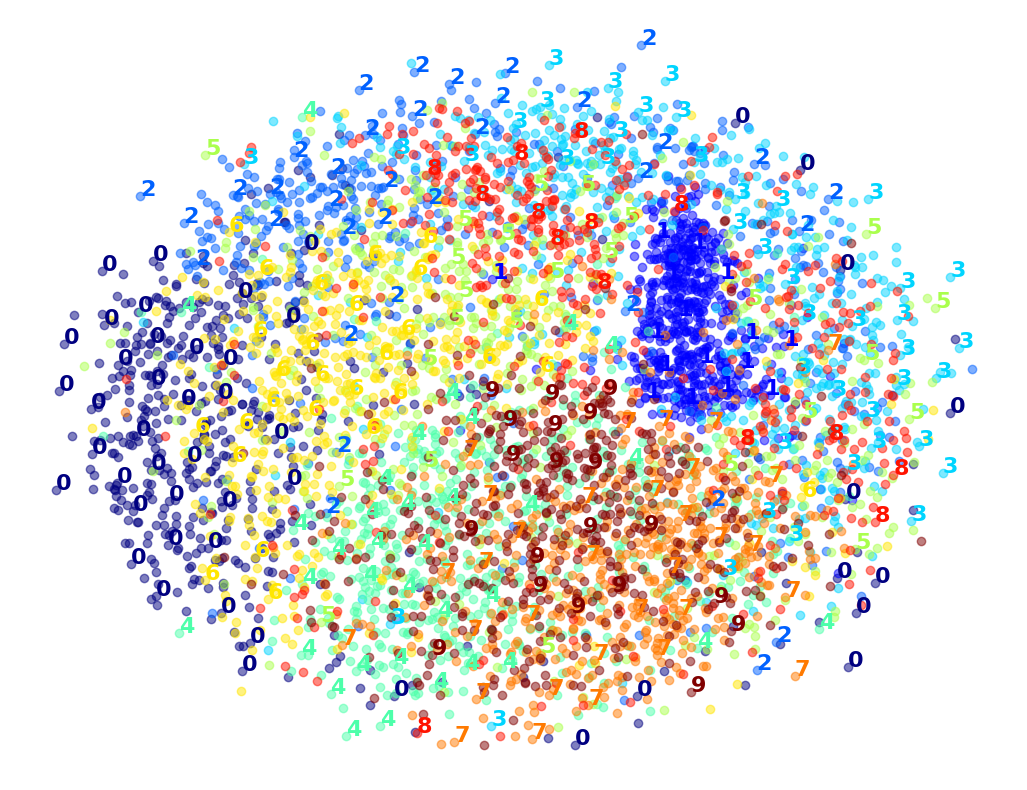

In [98]:
%time X_mds_reduced = MDS(n_components=2, normalized_stress=False, n_init=4, random_state=42).fit_transform(X_sample)
plot_digits(X_mds_reduced, y_sample)
plt.show()

CPU times: user 21min 45s, sys: 1h 29min 29s, total: 1h 51min 15s
Wall time: 12min 50s


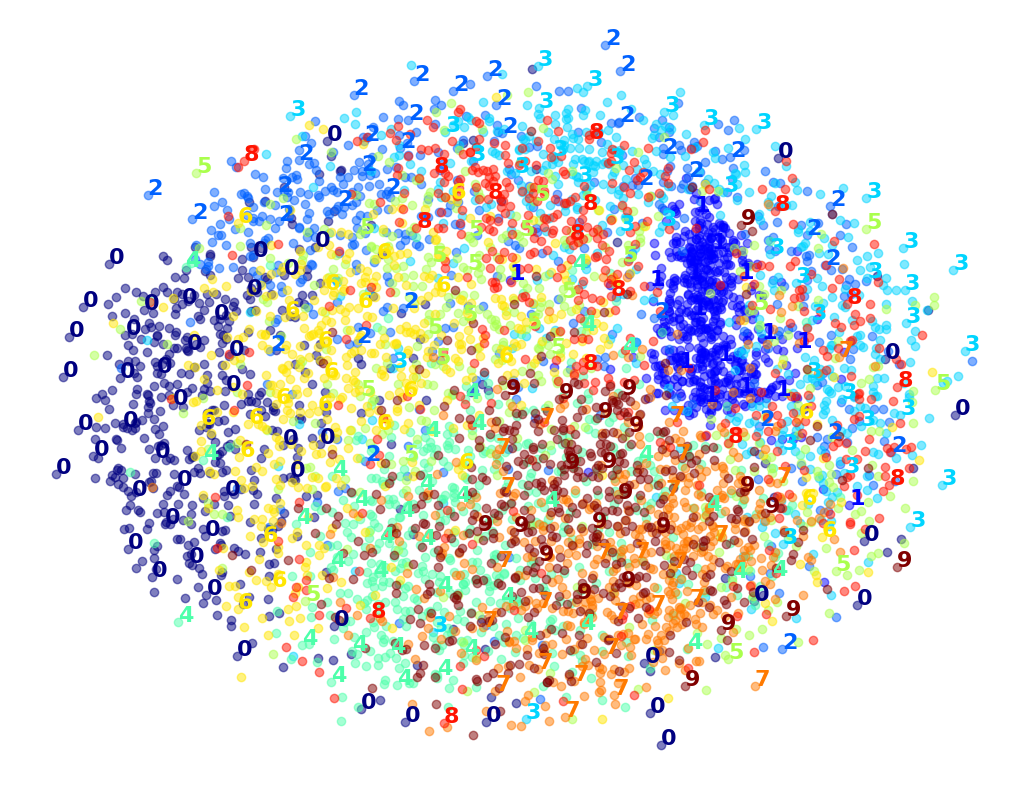

In [100]:
pca_mds = make_pipeline(
    PCA(n_components=0.95, random_state=42),
    MDS(n_components=2, normalized_stress=False, n_init=4, random_state=42)
)

%time X_pca_mds_reduced = pca_mds.fit_transform(X_sample)
plot_digits(X_pca_mds_reduced, y_sample)
plt.show()

CPU times: user 6.15 s, sys: 0 ns, total: 6.15 s
Wall time: 566 ms


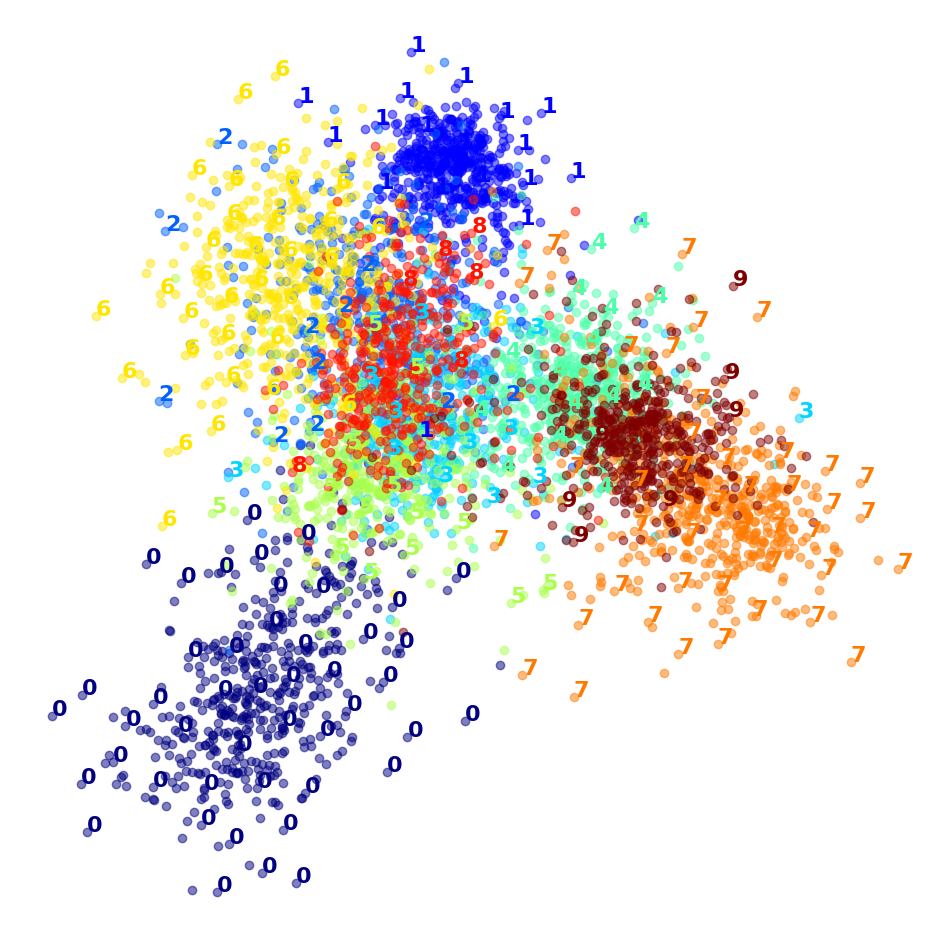

In [101]:
# try LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
%time X_lda_reduced = lda.fit_transform(X_sample, y_sample)
plot_digits(X_lda_reduced, y_sample, figsize=(12, 12))
plt.show()